Задание 1. Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
 #загрузили данные
data = pd.read_csv('water.csv')
data.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


<AxesSubplot:title={'center':'Зависимость между жесткостью воды и смертностью в городах'}, xlabel='hardness', ylabel='mortality'>

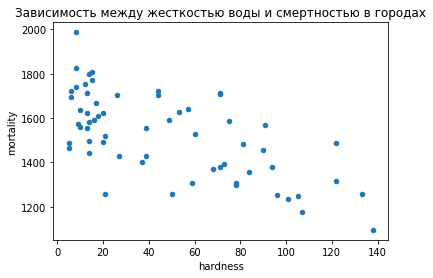

In [ ]:
#точечный график
data.plot(kind = 'scatter',
          x = 'hardness',
          y = 'mortality',
          title = 'Зависимость между жесткостью воды и смертностью в городах')

На данном графике проглядывается обратная корреляция  - чем жестче вода, тем меньше смертность, при этом в городах с мягкой водой уровень смертности выше.

In [ ]:
#считаем коэффициент корреляции Пирсона
data[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


Коэффициент корреляции Пирсона подтверждает наличие обратной корреляции, хоть и не слишком сильной - что мы видим и на графике, ведь имеются и города, где смертность не на таком высоком уровне при наличии в них мягкой воды.

In [ ]:
#считаем коэффициент корреляции Спирмена
data[['hardness', 'mortality']].corr(method = 'spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


Этот метод используем просто ради интереса, в данном случае нахождение к-тф Пирсона вполне достаточно, так как выбросов в датасете не наблюдается.

In [ ]:
# строим модель линейной регрессии
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x = data[['hardness']]
y = data['mortality']

In [ ]:
#назначем выборки
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 42)

In [ ]:
#обучаем модель
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
#коэффициент a
model.coef_

array([-3.13167087])

In [ ]:
#независимый коэффициент b
model.intercept_

1668.9722977277095

In [ ]:
#Сделаем прогноз на тестовых данных
y_pred = model.predict(x_test)
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

In [ ]:
#проверяем величину ошибки по к-ту детерминации
model.score(x_test, y_test)

0.5046490611017092

Коэффициент детерминации не слишком низок, но и не слишком высок, что говорит о среднем качестве нашей прогнозной модели.

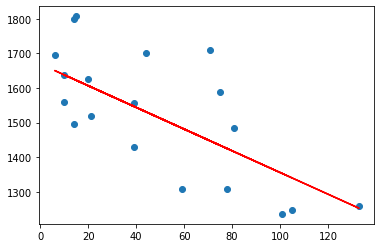

In [ ]:
#сравниваем прогноз и факт
plt.scatter(x_test,y_test)
plt.plot(x_test, y_pred, c= 'r')

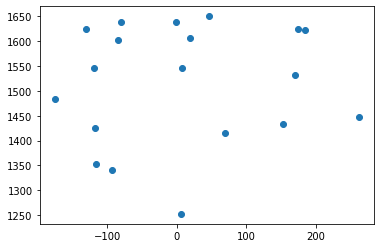

In [ ]:
#визуализируем остатки
residuals = y_test-y_pred
plt.scatter(residuals,y_pred)

plt.show()

С точки зрения хаотичности и отсутствии закономерностей, можно сказать что модель подобрана хорошо. Но остатки достаточно далеко расположены от прогнозной составляющей по обеим сторонам, так что модель точно не идеальна.

После нашего анализа можно сделать вывод, что определенная обратная взаимосвязь между жесткостью воды и уровнем смертности прослеживается, но она не может являться основополагающим фактором для выявления смертности населения. Возможно, более мягкая вода влияет на какой-то определенный орган, и в городах где больше людей с этим уязвимым органом смертность больше. Это лишь предположение, однозначный вывод при анализе всего двух факторов сделать сложно.

Задание 2
Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

In [ ]:
#разделим наши данные на 2 группы по северным и южным городам
mask1 = data['location'] == 'North'
north_ = data[mask1]
north_.head()

,Unnamed: 0,location,town,mortality,hardness
1,2,North,Birkenhead,1668,17
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
5,6,North,Bolton,1558,10
6,7,North,Bootle,1807,15


In [ ]:
mask2 = data['location'] == 'South'
south_ = data[mask2]
south_.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
2,3,South,Birmingham,1466,5
7,8,South,Bournemouth,1299,78
9,10,South,Brighton,1359,84
10,11,South,Bristol,1392,73


<AxesSubplot:title={'center':'Зависимость между жесткостью воды и смертностью в северных городах'}, xlabel='hardness', ylabel='mortality'>

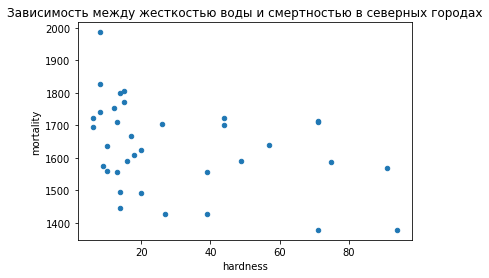

In [ ]:
#сделаем точечные графики по северным и южным городоам в отдельности
north_.plot(kind = 'scatter',
          x = 'hardness',
          y = 'mortality',
          title = 'Зависимость между жесткостью воды и смертностью в северных городах')

<AxesSubplot:title={'center':'Зависимость между жесткостью воды и смертностью в южных городах'}, xlabel='hardness', ylabel='mortality'>

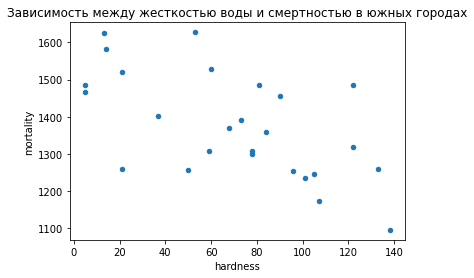

In [ ]:
south_.plot(kind = 'scatter',
          x = 'hardness',
          y = 'mortality',
          title = 'Зависимость между жесткостью воды и смертностью в южных городах')

В северных городах обратная зависимость прослеживается хуже, чем в южных. Имея мягкую воду в северных городах, смертность тут варьируется от низкого до очень высокого уровня. В южных городах корреляция чуть более явная.

In [ ]:
#считаем коэффициенты корреляции Пирсона и Спирмена
north_[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [ ]:
south_[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [ ]:
north_[['hardness', 'mortality']].corr(method = 'spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [ ]:
south_[['hardness', 'mortality']].corr(method = 'spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


Найденные коэффициенты доказывают нам наличие обратной связи в южных городах и ее практическое отсутствие в северных.

In [ ]:
#построим модель линейной регрессии по северным городам
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x = north_[['hardness']]
y = north_['mortality']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 42)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred

array([1672.33533095, 1670.35846869, 1660.47415739, 1676.28905547,
       1656.52043287, 1547.79300857, 1601.16828959, 1672.33533095,
       1611.05260089, 1658.49729513, 1611.05260089])

In [ ]:
model.score(x_test, y_test)

0.018885304285745863

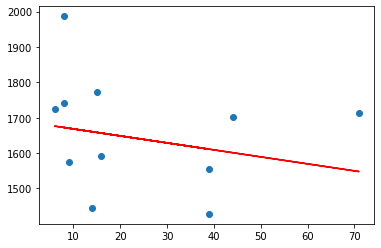

In [ ]:
plt.scatter(x_test,y_test)
plt.plot(x_test, y_pred, c= 'r')

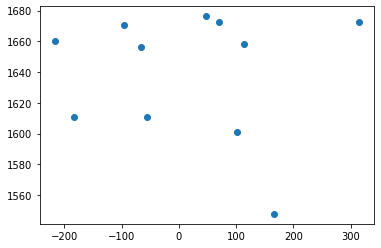

In [ ]:
#визуализируем остатки
residuals = y_test-y_pred
plt.scatter(residuals,y_pred)

plt.show()

По северным городам: в визуализации остатков имеются резкие выбросы, а коэффициент детерминации крайне низок. Нашу прогнозную модель нельзя считать успешной.

In [ ]:
#построим модель линейной регрессии по южным городам
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x = south_[['hardness']]
y = south_['mortality']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 42)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred

array([1211.58209643, 1622.65331428, 1271.31039304, 1211.58209643,
       1510.22357948, 1566.43844688, 1432.92813681, 1622.65331428])

In [ ]:
model.score(x_test, y_test)

-2.5519223012352077

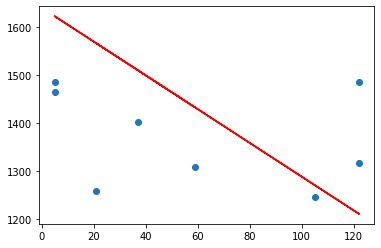

In [ ]:
plt.scatter(x_test,y_test)
plt.plot(x_test, y_pred, c= 'r')

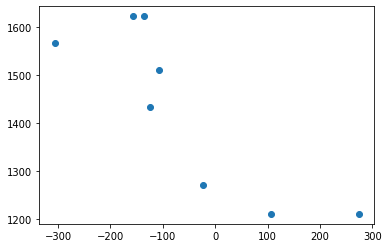

In [ ]:
#визуализируем остатки
residuals = y_test-y_pred
plt.scatter(residuals,y_pred)

plt.show()

Коэффициент детерминации ушел в большой минус. Это значит, что ошибка модели простого среднего меньше ошибки нашей прогнозной модели. Кроме того, в остатках присутствует тренд. Такая модель непригодна к использованию.

Вывод: несмотря на то, что графики корреляции показали нам, что в южных городах имеется некоторая взаимосвязь между составом воды и смертностью, мы не смогли составить успешную прогнозную модель. В северных городах взаимосвязь не проглядывается вовсе. Таким образом, факторов для того чтобы сделать вывод недостаточно. Для выявления уровня смертности необходимо исследовать большее количество факторов.